In [31]:
#SVM I.E. SUPPORT VECTOR MACHINE IS A SUPERVISED ML ALGORITHM.
#IN SUPERVISED ML ALGO WE GIVE THE DATA WHICH HAS LABELS
#HERE 2 LABELS ARE LOAN WILL BE APPROVED AND LOAN WILL BE REJECTED.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [33]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [34]:
type(data)

pandas.core.frame.DataFrame

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
data.shape

(614, 13)

In [38]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [39]:
#dropping the missing values
data=data.dropna()

In [40]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
#above we had categorical columns so we decided to drop the missing values.

In [42]:
#LABEL ENCODING -> REPLACING LETTERS WITH NOS.
#EG:IN LOAN_STATUS COLUMN WE HAVE Y AND N SO WE REPLACE Y WITH 1 AND N WITH 0.

In [43]:
data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [44]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [45]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [46]:
#WE CAN'T FEED 3+ VALUE IN OUR MODEL.

In [47]:
#SO WE REPLACE VALUE OF 3+ TO 4 (IT CAN ALSO BE 5 OR 6 ETC.)
#3+ DATATYPE CAN'T BE RECOGNIZED BY OUR Model. HENCE DONE SO.
data=data.replace(to_replace='3+',value=4)

In [48]:
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [49]:
#education vs loan_status

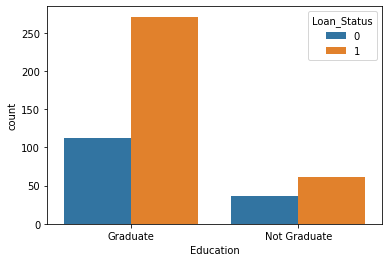

In [50]:
sns.countplot(x=data['Education'],hue='Loan_Status',data=data)

In [51]:
#0 means person does not get loan.
#1 means person gets loan.

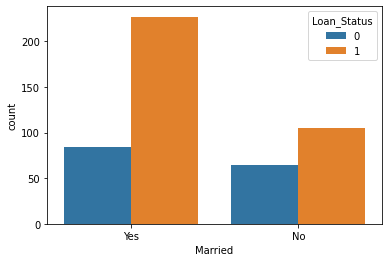

In [52]:
#marital_status vs loan_status
sns.countplot(x=data['Married'],hue=data['Loan_Status'],data=data)

In [53]:
#convert categorical columns to numerical values.
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [54]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [55]:
#separating the data and output label.
X=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=data['Loan_Status']
#Loan_ID is not required by us hence dropped.

In [56]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [57]:
#SPLITTING THE DATA INTO TRAINING AND TESTING DATA.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2);

In [58]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


In [59]:
#TRAINING THE MODEL NOW.

In [60]:
classifier=svm.SVC(kernel='linear')

In [61]:
#training the SVM
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [62]:
#MODEL EVALUATION

In [64]:
#ACCURACY SCORE ON TRAINING DATA
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [65]:
print('Accuracy Score On Training Data: ',training_data_accuracy)

Accuracy Score On Training Data:  0.7786458333333334


In [66]:
#ACCURACY SCORE ON TESTING DATA
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy Score On Test Data: ',test_data_accuracy)

Accuracy Score On Test Data:  0.8125


In [67]:
#ACCURACY SCORE IS GOOD.(NO OVERFITTING HERE)

In [68]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [71]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
205,0,0,0,0,0,4408,0.0,120.0,360.0,1.0,1
549,1,1,0,1,0,2785,2016.0,110.0,360.0,1.0,0
513,1,1,0,1,0,2130,6666.0,70.0,180.0,1.0,1
415,0,0,0,1,0,2995,0.0,60.0,360.0,1.0,2
271,1,1,0,1,0,11146,0.0,136.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
201,1,0,2,1,0,4923,0.0,166.0,360.0,0.0,1
345,1,1,0,1,0,2499,2458.0,160.0,360.0,1.0,1
607,1,1,2,0,0,3987,1411.0,157.0,360.0,1.0,0
543,1,1,1,0,0,2239,2524.0,128.0,360.0,1.0,2


In [70]:
Y_test

205    1
549    1
513    0
415    1
271    1
      ..
201    1
345    1
607    1
543    1
469    0
Name: Loan_Status, Length: 96, dtype: int64

In [85]:
array1=np.asarray(X_test)
array1

array([[0, 0, '0', ..., 360.0, 1.0, 1],
       [1, 1, '0', ..., 360.0, 1.0, 0],
       [1, 1, '0', ..., 180.0, 1.0, 1],
       ...,
       [1, 1, '2', ..., 360.0, 1.0, 0],
       [1, 1, '1', ..., 360.0, 1.0, 2],
       [1, 1, '0', ..., 360.0, 1.0, 2]], dtype=object)

In [97]:
array1[1]

array([1, 1, '0', 1, 0, 2785, 2016.0, 110.0, 360.0, 1.0, 0], dtype=object)

In [87]:
array2=np.asarray(Y_test)
array2

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0])

In [98]:
array2[1]

1

In [99]:
Input_data = (1, 1, '0', 1, 0, 2785, 2016.0, 110.0, 360.0, 1.0, 0)
Input_data_as_numpy_array = np.asarray(Input_data)
# reshaping the data as we are pridicting for one instance
input_reshaping = Input_data_as_numpy_array.reshape(1,-1)
x = classifier.predict(input_reshaping)
print(x)

[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [101]:
if(x[0]==0):
  print('Person is not eligible for loan.')
else:
  print('Person is eligible for loan.')

Person is eligible for loan.


In [102]:
Input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1)
Input_data_as_numpy_array = np.asarray(Input_data)
# reshaping the data as we are pridicting for one instance
input_reshaping = Input_data_as_numpy_array.reshape(1,-1)
x = classifier.predict(input_reshaping)
print(x)
if(x[0]==0):
  print('Person is not eligible for loan.')
else:
  print('Person is eligible for loan.')

[0]
Person is not eligible for loan.


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [103]:
#The model gives correct outputs for the example cases used above.